Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

- Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

- Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

- Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

- Matematik ve okuma notlarının dağılımı nedir?

- Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("C:/Users/Ahmet/Desktop/data/states_all.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [15]:
df.isnull().sum()
nan_col = ["ENROLL","TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE","LOCAL_REVENUE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
          "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE","GRADES_PK_G","GRADES_KG_G","GRADES_4_G",
          "GRADES_8_G","GRADES_12_G","GRADES_1_8_G","GRADES_9_12_G","GRADES_ALL_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE",
           "AVG_READING_4_SCORE","AVG_READING_8_SCORE"]
for name in nan_col:
    df[name] = winsorize(df[name], (0.15, 0.15))
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,238.0,279.0,218.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1800909.0,155894.0,957471.0,630061.0,1809138.0,955495.0,...,11549.0,11270.0,10092.0,NaN,NaN,148356.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,238.0,279.0,218.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1800909.0,178571.0,958785.0,630061.0,1809138.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,238.0,279.0,218.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,136710.0,137287.0,121152.0,NaN,NaN,1816414.0,238.0,279.0,218.0,NaN


In [16]:
def numerical_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

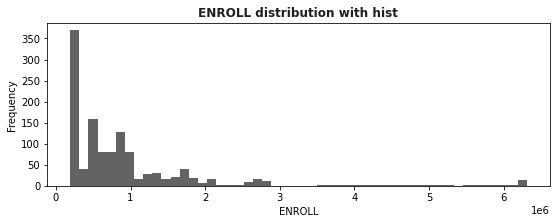

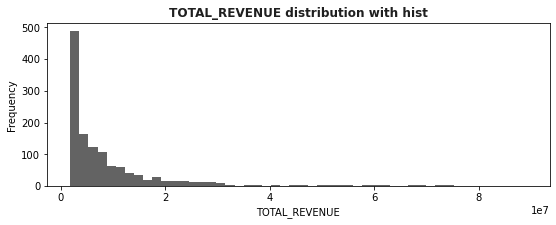

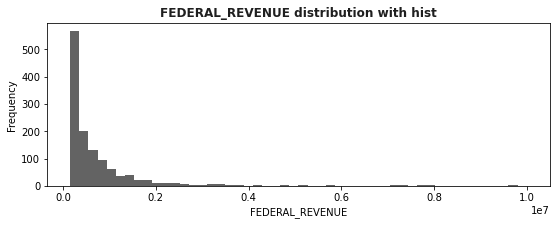

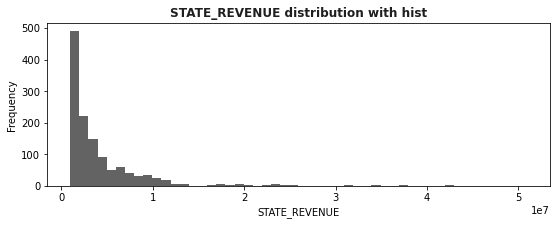

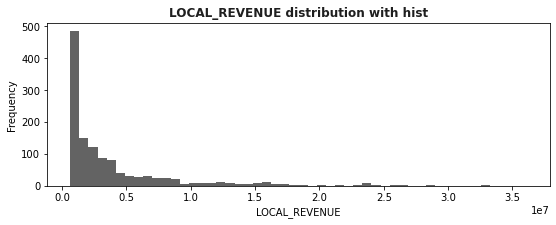

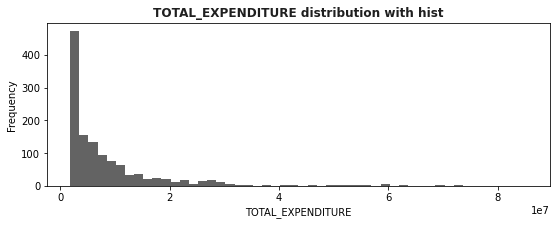

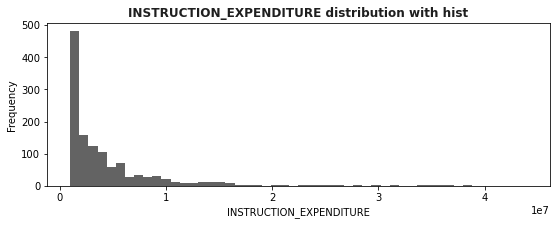

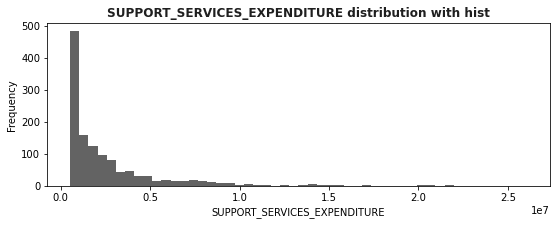

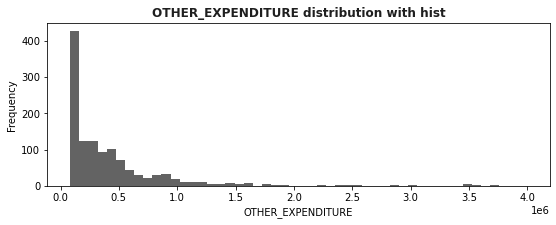

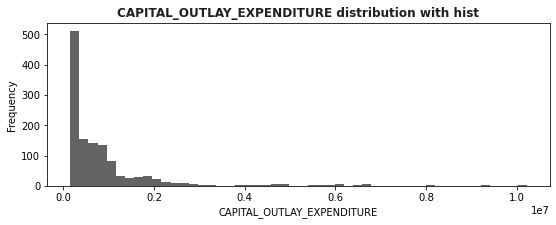

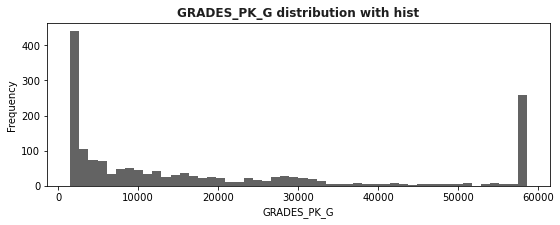

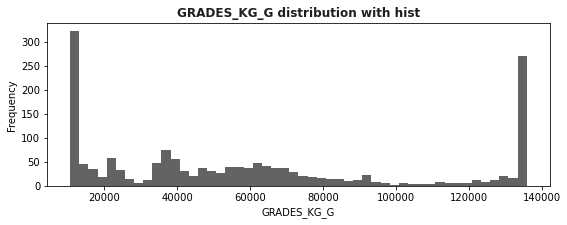

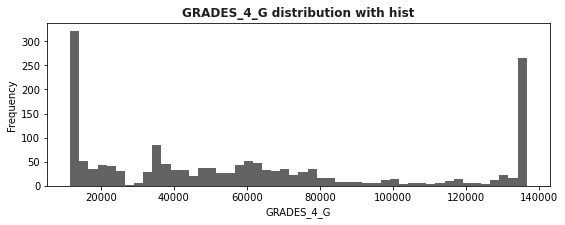

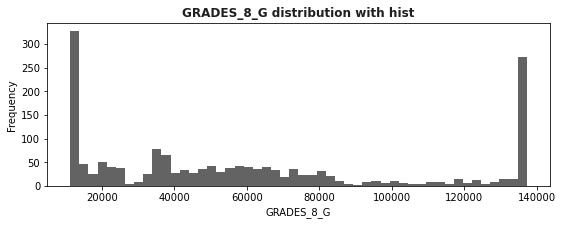

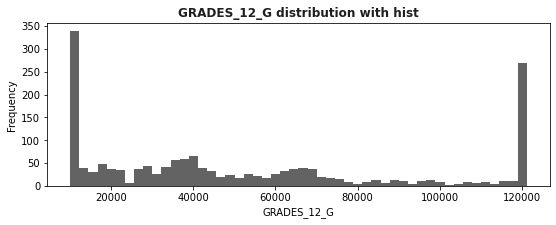

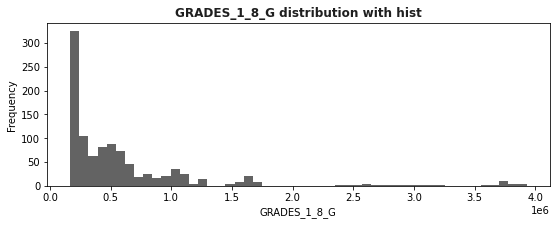

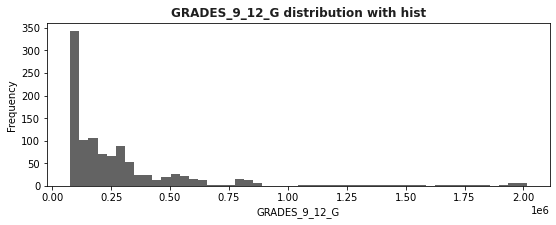

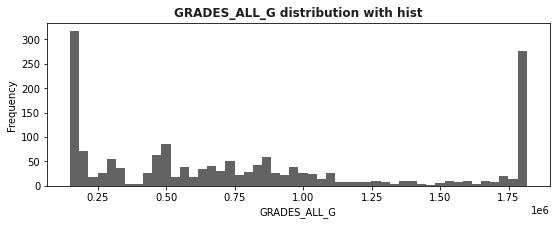

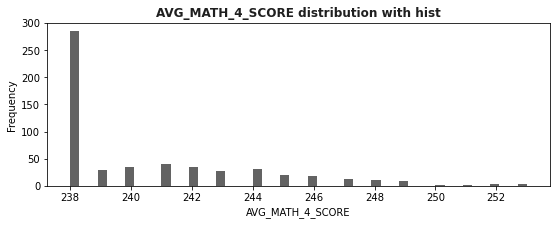

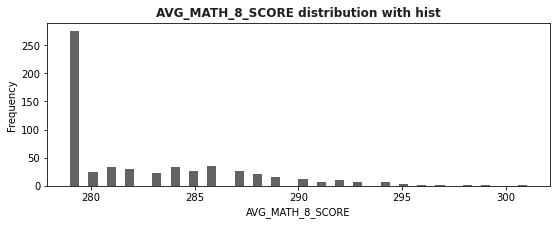

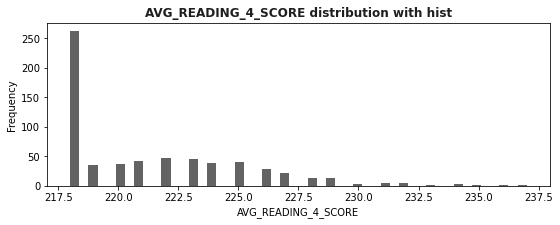

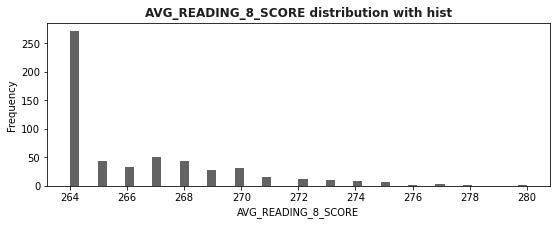

In [17]:
for n in nan_col:
    numerical_vis(n)

When we look at the "GRADES_PK_G, GRADES_KG_G, GRADES_4_G, GRADES_8_G, GRADES_12_G" variables, we see that the distribution is gathered at the extremes. It is not easy to comment because it also includes the year variable, but we can say that the regions where the number of students are low or high are higher in number. For the other variables, there is not much noticeable difference.

In [67]:
mst.groupby("YEAR").sum().TOTAL_REVENUE
mst.groupby("YEAR").sum().TOTAL_EXPENDITURE


YEAR
1986           0.0
1987           0.0
1988           0.0
1989           0.0
1990           0.0
1991           0.0
1992     4981125.0
1993     5290504.0
1994     5581140.0
1995     6155324.0
1996     6423285.0
1997     6890773.0
1998     6815289.0
1999     7450965.0
2000     7736391.0
2001     8221636.0
2002     8716123.0
2003     8938770.0
2004     8963393.0
2005     9082593.0
2006     9671933.0
2007    10030105.0
2008    10462624.0
2009    11193640.0
2010    10564774.0
2011    10612480.0
2012    10696348.0
2013    10942019.0
2014    11300786.0
2015    11969872.0
2016    12848946.0
2017           0.0
2019           0.0
Name: TOTAL_EXPENDITURE, dtype: float64

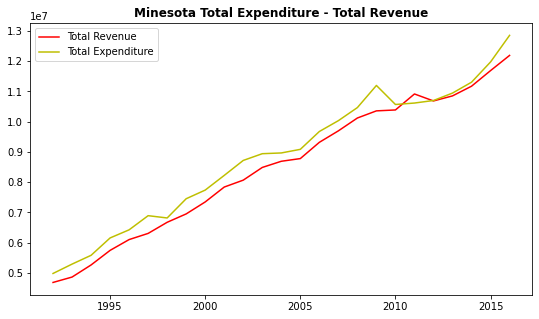

In [71]:
mst = df[df.STATE == "MINNESOTA"]
mst_rev = mst.groupby("YEAR").sum().TOTAL_REVENUE.iloc[6:-2]
mst_exp = mst.groupby("YEAR").sum().TOTAL_EXPENDITURE.iloc[6:-2]


plt.figure(figsize=(9,5))
plt.plot(mst_rev.index,mst_rev.values,color="r")
plt.plot(mst_exp.index,mst_exp.values,color="y")
plt.title("Minesota Total Expenditure - Total Revenue",fontweight="bold",fontsize=12)
plt.legend(["Total Revenue","Total Expenditure"])
plt.show()

When we examine the line graph above, we see that total income and total expenditures have increased over the years. We see that around 2008 there was a peak for total expenditure.

In [77]:
mst.columns
avg_mth = mst[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE']].mean()
avg_rdn = mst[['AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].mean()
print(avg_mth)
print("*"*35)
print(avg_rdn)

AVG_MATH_4_SCORE    246.272727
AVG_MATH_8_SCORE    290.333333
dtype: float64
***********************************
AVG_READING_4_SCORE    222.923077
AVG_READING_8_SCORE    268.300000
dtype: float64


On average grades, students in Minnesota do better in reading than in math.

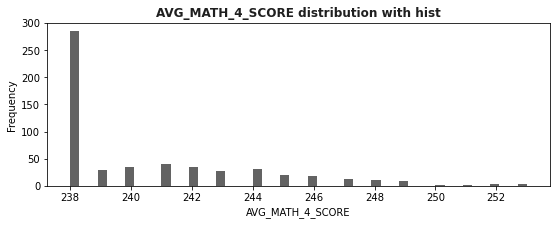

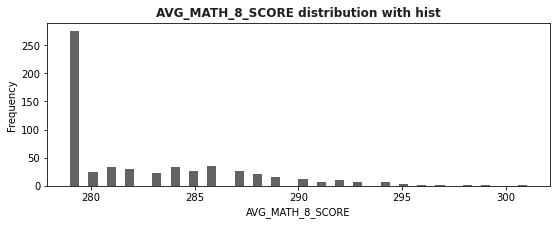

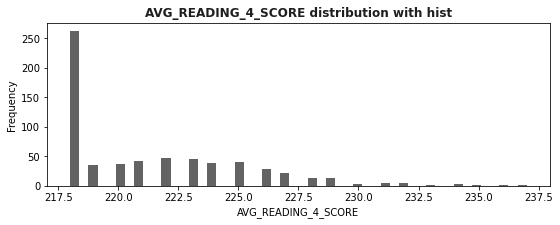

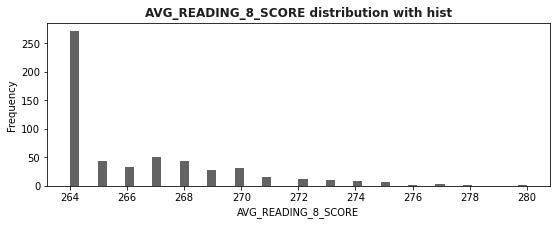

In [129]:
mst_columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
num=1
for n in mst_columns:
    numerical_vis(n)
    num+=1

In [104]:
mst_mean = mst[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
mst_median = mst[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
mst_int = mst[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]

# Mean
for i in mst_columns:
    mst_mean[i].fillna(mst_mean[i].mean(),inplace=True)
    
# Median
for i in mst_columns:
    mst_median[i].fillna(mst_median[i].median(),inplace=True)
    
# interpolation
for i in mst_columns:
    mst_int[i] = mst_int[i].interpolate(method='linear',limit_direction="Forward")

print("Mean")
print(mst_mean.isnull().sum())
print("*"*30)
print("Median")
print(mst_median.isnull().sum())
print("*"*30)
mst_int.dropna(inplace=True) #Those first 6 values was NaN so they were returning NaN even I intrepolated them. I dropped them because of it.
print("Interpolation")
print(mst_int.isnull().sum())

Mean
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64
******************************
Median
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64
******************************
Interpolation
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64


In [133]:
def mst_mean_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(mst_mean[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist - mean".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

def mst_median_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(mst_median[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist - median".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

def mst_int_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(mst_int[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist - interpolation".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

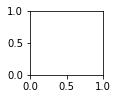

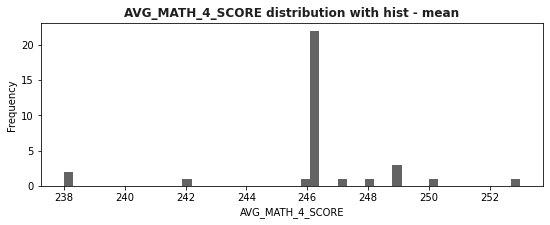

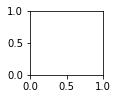

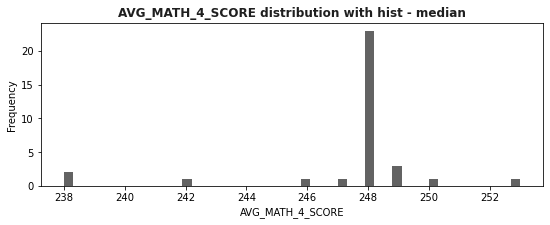

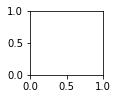

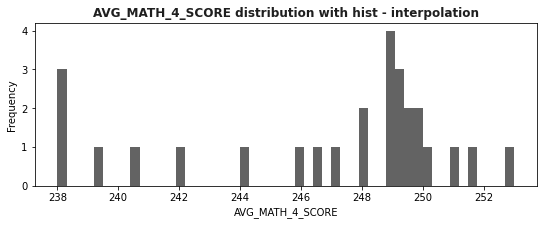

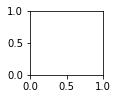

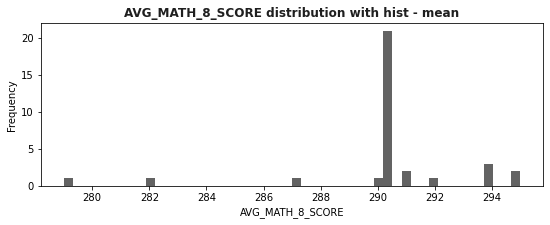

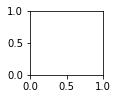

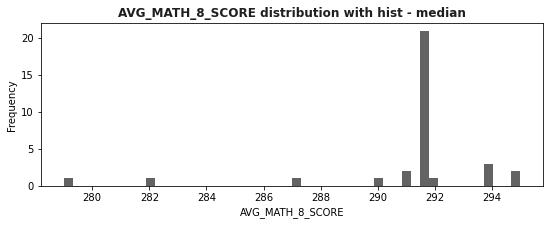

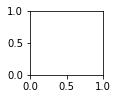

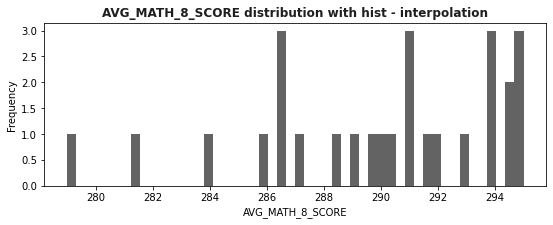

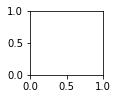

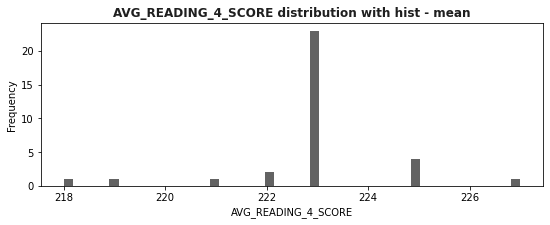

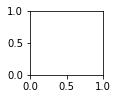

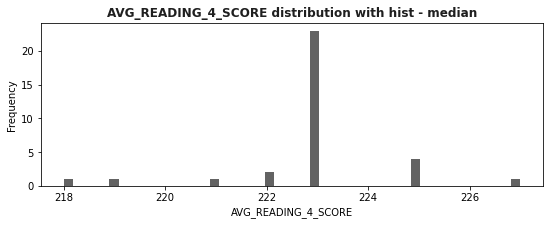

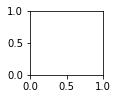

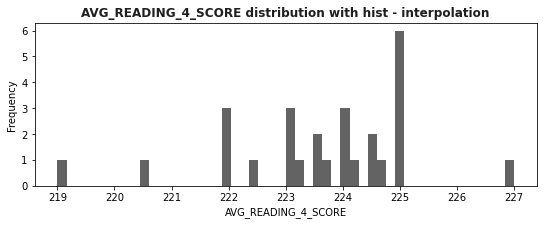

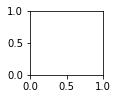

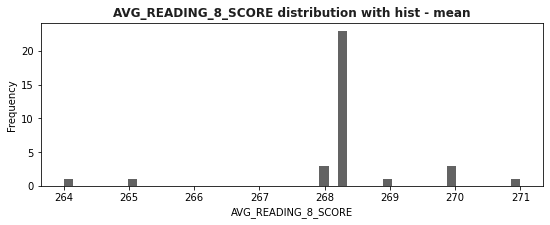

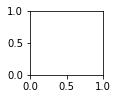

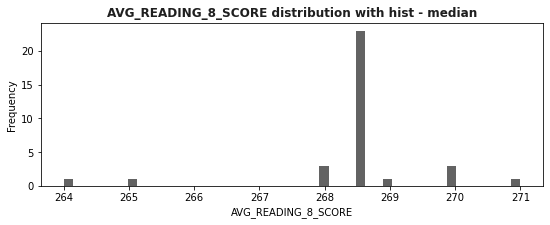

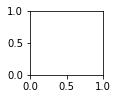

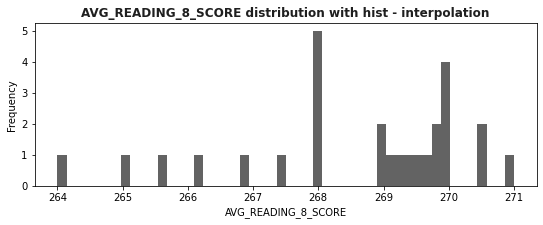

In [134]:
num = 1
for n in mst_columns:
    plt.subplot(3,4,num)
    mst_mean_vis(n)
    plt.subplot(3,4,num+4)
    mst_median_vis(n)
    plt.subplot(3,4,num+8)
    mst_int_vis(n)
    num+=1
plt.show()